<a href="https://colab.research.google.com/github/arkrett/SI618-HW4/blob/main/SI_618_Homework_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SI 618 Homework #4

## Taylor Swift songs

Last updated 2023-10-04

The dataset for this assignment is from https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data.

**NOTE**: Use the dataset from Canvas rather than the dataset from Kaggle, which is updated frequently and may change while you are completing this assignment.

This dataset consist of data from Spotify's API on all albums listed on Spotify for Taylor Swift. I set up the dataset to update monthly so that if any albums get added it will get added to the dataset too. At first it may look like there are song duplicates but I checked and all song IDs are unique.

The columns in this dataset are:

name - the name of the song

album - the name of the album

release_date - the day month and year the album was released

track number - the order the song appears on the album

id - the Spotify id for the song

uri - the Spotify uri for the song

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

popularity - the popularity of the song from 0 to 100

duration_ms - The duration of the track in milliseconds.

We are going to refer to the tracks' properties of danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, and valence as "features" of the tracks.



Each of the questions is worth the same number of points, except for the final bonus question, which is worth up to an additional 2 points (out of 100).  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

Be sure to include interpretations of your results for each question.

In [207]:
# Used to check for PEP 8 compliance
!pip install flake8 pycodestyle_magic
%load_ext pycodestyle_magic
%pycodestyle_on

In [208]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [209]:
# Self-hosted data because it's more convenient when using Colab
data = 'https://raw.githubusercontent.com/arkrett/SI618-HW4/main/taylor_swift_spotify.csv'
tswift = pd.read_csv(data)
tswift.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,77,202395
1,1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,76,218270
2,2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.1330,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,77,200690
3,3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.7350,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,74,256124
4,4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.4160,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,76,194206


INFO:pycodestyle:2:80: E501 line too long (90 > 79 characters)


In [210]:
# Un-named seems to duplicate the indexing.
tswift = tswift.drop('Unnamed: 0', axis=1)
tswift.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,77,202395
1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,76,218270
2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.1330,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,77,200690
3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.7350,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,74,256124
4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.4160,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,76,194206


Q1: Show the distribution of the popularity of the songs.  Then exclude the songs that are from karaoke albums (i.e., the album name contains "karaoke").  Show the distribution of the popularity of the songs.  What is the difference between the two distributions?

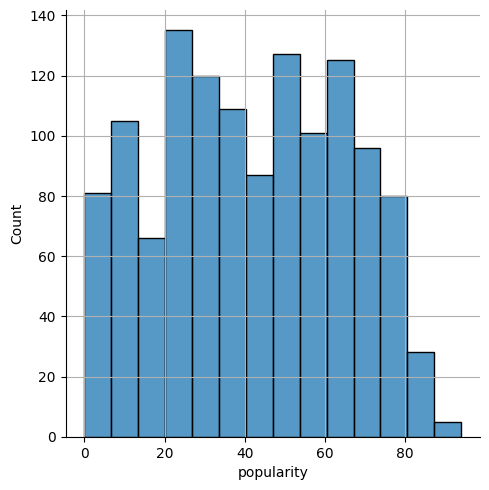

<Figure size 1000x600 with 0 Axes>

In [211]:
sns.displot(tswift['popularity'])
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()

It looks like a relatively consistent distribution until the 80s, with a smattering of spikes across the midrange ratings of 20-80.

Before we remove the karaoke songs, let's see what we're working with.

In [212]:
avg = tswift[tswift['album'].str.contains('karaoke', case=False)].describe()
avg.popularity

count    190.000000
mean       9.100000
std        7.381193
min        0.000000
25%        1.750000
50%        8.000000
75%       14.000000
max       30.000000
Name: popularity, dtype: float64

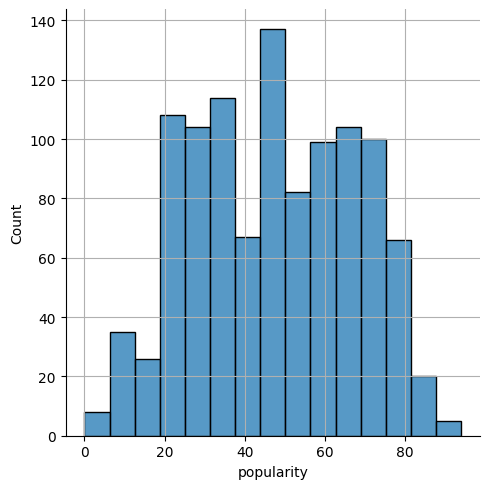

<Figure size 1000x600 with 0 Axes>

In [213]:
# Elected to over-write since karaoke not used again.
tswift = tswift[~tswift['album'].str.contains('karaoke', case=False)]
sns.displot(tswift['popularity'])
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()

This looks a lot more like a normal distribution, though the dips at 40 and 55 are strange. In terms of the karaoke music, it is clearly unpopular, with a mean rating of just 9 / 100 and a maximum rating of just 30/100. Upon looking the karaoke songs up on Spotify, learned the karaoke songs have the lead vocals of Taylor Swift removed. As people like to listen to Taylor Swift sing, songs "without her" in them are understandably unpopular- not to mention the most common listening case likely involves annoying friends or significant others.

### <font color='magenta'>IMPORTANT NOTE: the remainder of the questions are based on the songs that are NOT from karaoke albums.</font>

Q2: Report the average track duration for each album.  You answer should be in mm:ss (minutes:seconds) format rather than the milliseconds that are reported in the original dataset.

In [214]:
# Function to convert time to minutes and seconds
def ms_to_minsec(ms):
    seconds = ms / 1000
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f"{minutes}:{seconds}"

In [215]:
# Convert ms to minutes and seconds
tswift['time'] = tswift['duration_ms'].apply(ms_to_minsec)
tswift.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,time
0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,77,202395,3:22
1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,76,218270,3:38
2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.1330,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,77,200690,3:20
3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.7350,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,74,256124,4:16
4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.4160,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,76,194206,3:14


In [216]:
avg_duration = tswift.groupby('album')['duration_ms'].mean()
avg_song_len = ms_to_minsec(avg_duration.mean())
print(f"The average length of all Taylor Swift songs is {avg_song_len}")

In [217]:
avg_duration = avg_duration.apply(ms_to_minsec)
avg_duration = pd.DataFrame(avg_duration).reset_index()
avg_duration.columns = ['Album', 'Duration (min:sec)']
avg_duration

,Album,Duration (min:sec)
0,1989,3:45
1,1989 (Big Machine Radio Release Special),2:37
2,1989 (Deluxe Edition),3:41
3,1989 (Deluxe),3:37
4,Fearless,4:0
5,Fearless (Big Machine Radio Release Special),2:33
6,Fearless (International Version),4:0
7,Fearless (Platinum Edition),4:10
8,Fearless (Taylor's Version),4:5
9,Fearless Platinum Edition,4:10


It looks like most of Taylor's songs are relatively short, with an average duration of 3 minutes and 49 seconds. Shorter songs work well for radio and are more in line with the pop style than longer ballads (for example, Pink Floyd).

Q3: Show a heatmap of the correlations between the features.  Use a diverging colormap with white in the middle (i.e. white at a correlation of 0.0).

<ipython-input-218-01f9947523c5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tswift.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


<Axes: >

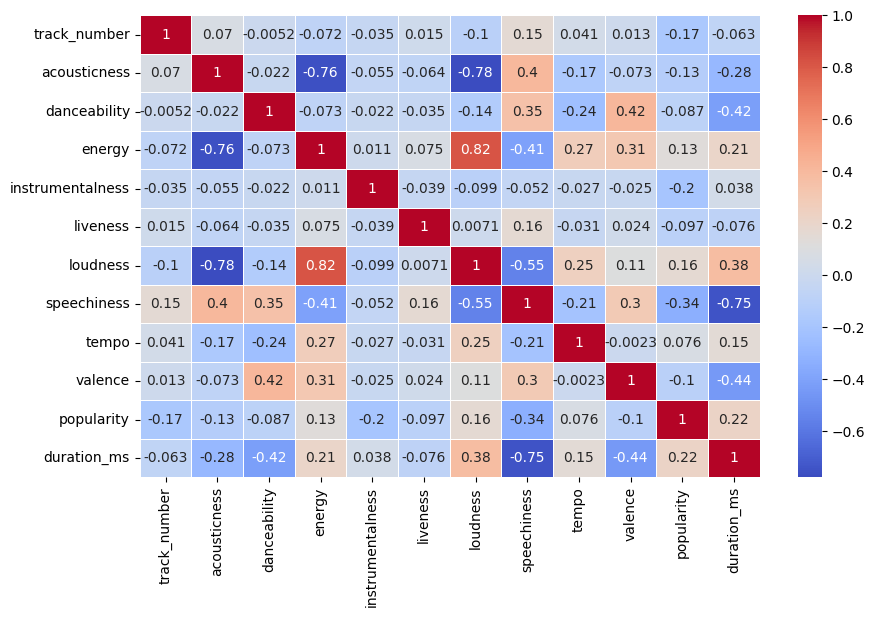

In [218]:
plt.figure(figsize=(10, 6))  # To prevent bunching
sns.heatmap(tswift.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

It looks like energy and loudness are very strongly correlated. That makes logical sense- more energetic songs tend to have more going on in them. Next, it looks like loudness and acousticness are inversely correlated. Plus, the speechier the song, the shorter it is.
A surprising number of things I expected to be correlated, however, are not. For example, duration and popularity are weakly correlated, if that. Additionally, while speechiness was somewhat negatively corellated with popularity, energy was super weakly correlated.

Overall, there appear to be quite a lot of patterns here. Some of their meaning is obfuscated by the challenges in understanding the metrics- for example, how does "valence" indicate the positiveness of a track? What traits create positiveness? (Long, danceable, and energetic songs, according to the correlation chart)

Q4: List the top 5 correlations between the features of the songs.

In [219]:
top_corr = tswift.corr().unstack().sort_values(
    ascending=False).drop_duplicates()[1:]
top_corr = pd.DataFrame(top_corr).reset_index()
top_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
# List the top 5 correlations
print('These are the top five correlations between song features:')
top_corr.head(5)

<ipython-input-219-b9872b6ca0ff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_corr = tswift.corr().unstack().sort_values(


,Feature 1,Feature 2,Correlation
0,energy,loudness,0.817729
1,danceability,valence,0.415063
2,acousticness,speechiness,0.404049
3,duration_ms,loudness,0.378038
4,speechiness,danceability,0.350922


These seem largely logical, but a few are surprising. It seems logical that a louder song would be more energetic, since there is more going on in the music. It is also logical that a positive song would be more danceable, since people dance to happy music. Acousticness and speechiness both seem relatively abstract, but the correlation indicates that fans prefer more acoustic-sounding music with a lot of vocals more than fewer lyrics or more electronic music.

It's surprising to see that duration and loudness are positively correlated. That means that longer, louder songs are preferred by Taylor Swift listeners- and being mostly unfamiliar with her music, I am not sure why. However, since duration and energy are positively correlated, they may be interdependent.

Finally, speechiness and danceability are positively correlated, which is quite surprising, especially since a 1 on the speechiness scale is literally spoken word. It looks like Taylor Swift's songs with more spoken vocals are more "danceable", based on whatever combination of metrics determines danceablility.

Q5: Does the position of the track on the album (i.e. track number) have an effect on the popularity of the song?  Use both visual and statistical evidence to support your answer.

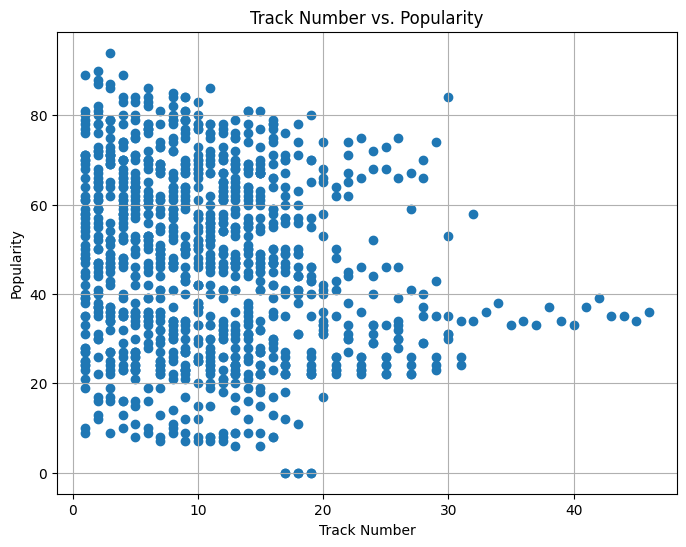

In [220]:
plt.figure(figsize=(8, 6))
plt.scatter(tswift['track_number'], tswift['popularity'])
plt.xlabel('Track Number')
plt.ylabel('Popularity')
plt.title('Track Number vs. Popularity')
plt.grid(True)  # Used documentation
plt.show()

In [221]:
correlation = tswift['track_number'].corr(tswift['popularity'])
print(f'Correlation coefficient: {correlation}')

It looks like there is a weak negative correlation- as track number increases, the popularity decreases slightly with track number.In the age of Spotify and mobile device use, it makes sense users visiting the album page may be more likely to pick one of the songs that appears on their screen without needing to scroll. Alternatively (or perhaps additionally), Taylor Swift may put more enjoyable / favored songs in lower track numbers if that enhances their number of plays.

Q6: Are popular songs more danceable?
Divide the songs into popular (i.e. those with a popularity rating of 60 or higher) and less popular (i.e. those with a popularity rating of less than 60).
Conduct an ANOVA test for the two groups of data based on danceability feature. Are they statistically significant?

In [222]:
popular = tswift[tswift['popularity'] >= 60]['danceability']
unpopular = tswift[tswift['popularity'] < 60]['danceability']

# ANOVA test
f_statistic, p_value = stats.f_oneway(popular, unpopular)
alpha = 0.05

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Is it statistically significant?
if p_value < alpha:
    print("This is a statistically significant difference.")
else:
    print("There is no statistically significant difference.")

Popular songs are indeed more danceable! In our earlier statistics, we interestingly see no correlation for popularity and danceability, but there is a difference when the dataset is split into popular and unpopular sections. However, it is important to keep in mind a significant portion of the data is now in the "unpopular" section.

Q7: Create a regression model with "popularity" as the dependent variable and "liveness" as the predictor variable.
Report the following:
1. Coefficient of determination (i.e. $r^2$)
2. Whether the regression is statistically significant
3. An estimate for the value of "popularity" when the value of "liveness" is 0.22.

In [223]:
model0 = smf.ols("Q('popularity') ~ Q('liveness')", data=tswift).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('popularity')   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.12
Date:                Thu, 12 Oct 2023   Prob (F-statistic):            0.00150
Time:                        05:32:28   Log-Likelihood:                -4743.8
No. Observations:                1075   AIC:                             9492.
Df Residuals:                    1073   BIC:                             9502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        49.8667      1.017     49.048      0.000      47.872      51.862
Q('liveness')   -16.1986      5.091     -3.182      0.002     -26.188      -6.210
==============================================================================
Omnibus:                      183.152   Durbin-Watson:                   0.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.318
Skew:                          -0.056   Prob(JB):                     1.07e-09
Kurtosis:                       2.046   Cond. No.                         8.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r^2 value of 0.009 indicates liveness is not a usable predictor for popularity in the dataset. The p-value is tiny at 0.00150, much smaller than p = 0.05, indicating statistical significance.

In [224]:
# Popularity = intercept + coefficient of liveness * liveness value
popularity = 49.8667 + -16.1986 * 0.22
round(popularity, 2)

46.3

While liveness is not a good predictor of popularity, the estimated popularity is about 46.30 when liveness is 0.22, indicating a decent level of popularity.

Q8: Due to intellectual property conflicts, Taylor Swift re-recorded some of her earlier albums, including `Fearless` and `Red`.  We assume that re-recording her early albums will allow Taylor Swift to reclaim her artistry control, revisit the songs and make any changes she wants. Therefore, we want to see whether the new songs are more loved by the audiences by looking at the popularity score.

* The re-recorded ones have `(Taylor’s version)` at the end of the album name.

a) Create a visualization that shows the distribution of popularity scores of original vs. re-recorded songs.  There are multiple visualizations that would be appropriate here.  You can choose any of them.  At a minimum, you should create one visualization.  Creating additional ones can earn you additional points.

b) Is there a statistically significant difference between the popularity scores of the original and re-recorded songs?  If so, which one is more popular?  How much more popular is it, on average?

In [225]:
rerecordeds = tswift[tswift['album'].str.contains("Taylor's Version")]
originals = tswift[~tswift['album'].str.contains("Taylor's Version")]

In [226]:
rerecordeds.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,time
66,State Of Grace (Taylor's Version),Red (Taylor's Version),2021-11-12,1,6lzc0Al0zfZOIFsFvBS1ki,spotify:track:6lzc0Al0zfZOIFsFvBS1ki,0.000328,0.594,0.713,0.000000,0.1140,-5.314,0.0503,129.958,0.328,71,295413,4:55
67,Red (Taylor's Version),Red (Taylor's Version),2021-11-12,2,4OAuvHryIVv4kMDNSLuPt6,spotify:track:4OAuvHryIVv4kMDNSLuPt6,0.001080,0.516,0.777,0.000002,0.0761,-4.908,0.0375,125.047,0.408,78,223093,3:43
68,Treacherous (Taylor's Version),Red (Taylor's Version),2021-11-12,3,3S7HNKPakdwNEBFIVTL6dZ,spotify:track:3S7HNKPakdwNEBFIVTL6dZ,0.034400,0.645,0.593,0.000127,0.1300,-6.506,0.0288,109.984,0.299,71,242720,4:2
69,I Knew You Were Trouble (Taylor's Version),Red (Taylor's Version),2021-11-12,4,6AtZLIzUINvExIUy4QhdjP,spotify:track:6AtZLIzUINvExIUy4QhdjP,0.012900,0.584,0.557,0.000000,0.0576,-6.371,0.0342,154.008,0.767,78,219760,3:39
70,All Too Well (Taylor's Version),Red (Taylor's Version),2021-11-12,5,3nsfB1vus2qaloUdcBZvDu,spotify:track:3nsfB1vus2qaloUdcBZvDu,0.017100,0.440,0.528,0.002030,0.2340,-7.809,0.0317,185.972,0.132,75,329160,5:29


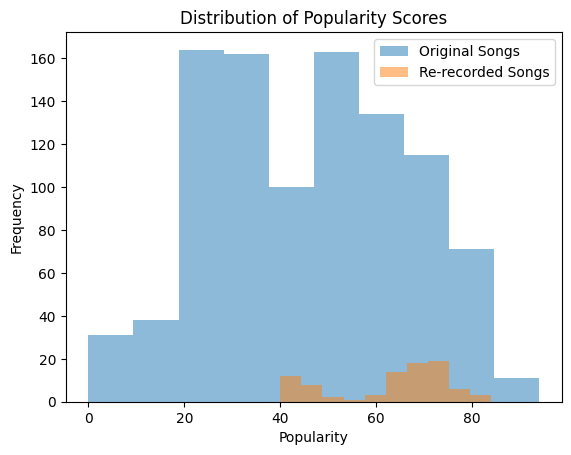

In [227]:
# Create histograms to show comparison
plt.hist(originals['popularity'],
         bins=10,
         alpha=0.5,
         label='Original Songs')
plt.hist(rerecordeds['popularity'], bins=10,
         alpha=0.5,
         label='Re-recorded Songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Popularity Scores')
plt.show()

This visualization shows the raw frequencies, and there are far fewer re-recorded songs, so it looks strange. I'll normalize these numbers to make it easier to compare.

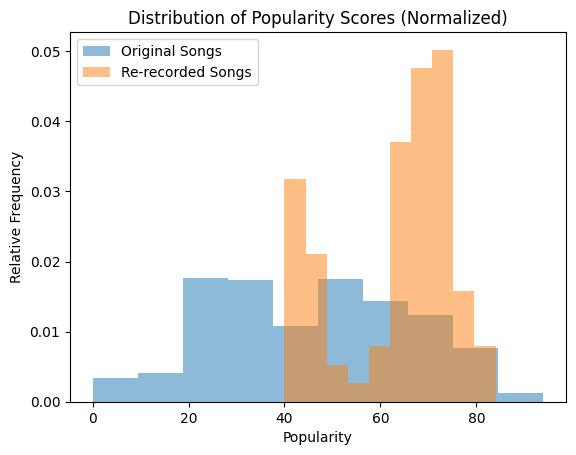

In [228]:
plt.hist(originals['popularity'], bins=10,
         alpha=0.5,
         label='Original Songs',
         density=True)
plt.hist(rerecordeds['popularity'],
         bins=10,
         alpha=0.5,
         label='Re-recorded Songs',
         density=True)
plt.xlabel('Popularity')
plt.ylabel('Relative Frequency')
plt.legend()
plt.title('Distribution of Popularity Scores (Normalized)')
plt.show()

It looks like the re-recorded songs are far more popular than the original songs.

In [229]:
# I need to remake a complete dataframe to visualize the violin plot
originals['status'] = "Original"
rerecordeds['status'] = "Rerecorded"
combined_data = pd.concat([originals, rerecordeds])

<ipython-input-229-e19eb34788e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  originals['status'] = "Original"
<ipython-input-229-e19eb34788e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rerecordeds['status'] = "Rerecorded"


<Axes: xlabel='status', ylabel='popularity'>

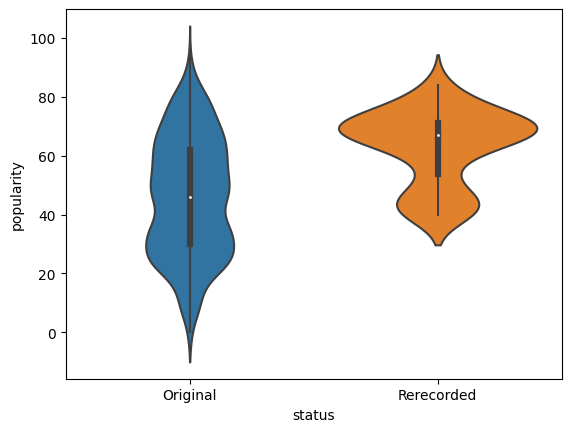

In [230]:
sns.violinplot(x='status', y='popularity', data=combined_data)

There is a massive difference in popularity. I'm willing to make an educated guess that this would look a little different if Taylor re-records the karaoke songs (Remember, they are not examined here. If they were, and they were re-recorded, they would likely be unpopular and change how this data looks.)

The re-recorded songs are much more popular with a narrower distribution and a higher number of frequencies at those high popularities. In contrast, the original songs are spread all the way across the popularity spectrum, with a wide and relatively consistent distribution of frequencies for each popularity between 20 and 70.

BONUS, worth up to 2 points: How would you determine whether [Taylor Swift has had an effect on the popularity of football](https://duckduckgo.com/?q=taylor+swift+football&atb=v314-1&ia=web)?  What data would you need?  What analysis would you perform?  What would you expect the results to be?

It looks like Taylor Swift is dating a football person, and driving engagement and popularity from people who otherwise would not be as interested in football. I would examine whether searches for football information, Taylor swift relationship information, and ticket sales have increased, while attempting to control for other factors that might be affecting ticket prices and attraction to football. For example, if Taylor Swift endorsed or supported a particular game, how did that game's sales and social media interaction change compared to non-endorsed games of similar caliber? What about before and after her endorsement / support?

I would do a correlation test and a linear regression analysis, and I honestly expect to reject the null hypothesis and find that anything she touches becomes significantly more popular. She was literally able to drive up voter registrations with a tweet- and that pales in comparison, in the interest of fans, to something like her relationship or actual attendance at football games.

### Submit your completed assignment in both IPYNB and HTML formats.

In [232]:
# Ignore, these are my personal instructions for html conversion.
# Format as: !jupyter nbconvert /content/mynotebook.ipynb --to html
# To use, download and re-upload  ipnyb to make it a file on Colab
# Then, uncomment and run the cell below. Download and submit the HTML.
# !jupyter nbconvert '/content/SI_618_Homework_04.ipynb' --to html

INFO:pycodestyle:5:57: E225 missing whitespace around operator
